In [392]:
# Step 1:Import relevant packages
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# Play with the image dataset
cat_pic_1 = cv2.imread(r"C:\Users\leesi\Favorites\Data Sources\Cat and dog classification\train\cat\Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg", cv2.IMREAD_COLOR)
cat_pic_2 = cv2.resize(cat_pic_1, (100, 100))
cat_pic_2 = cat_pic_2.flatten()
print(cat_pic_2)

In [ ]:
# Helper function 1 - get file location
def get_file_locations(folder_location):
    file_locations = []
    
    for root, dirs, files in os.walk(folder_location):
        for file in files:
            file_path = os.path.join(root, file)
            file_locations.append(file_path)
    
    return file_locations

In [ ]:
# Helper function 2 - Loading data in
def getImageData(address, label, img_size = 100):
    file_loc = get_file_locations(address)

    # Define parameters
    num_record = len(file_loc)

    # Process data
    data = []
    for i in range(num_record):
        image = cv2.imread(file_loc[i], cv2.IMREAD_COLOR) 
        # IMREAD_COLOR is used to read the image as an RGB image. It ignores the alpha channel present in the image. It is the default value for the flag parameters.
        # cv2.imread(path, flag) is the template for the imread function
        # Flag: It will specify a way in which the image is supposed to be read. By default, it takes a colour value which is cv2.IMREAD_COLOR.
        image = cv2.resize(image, (img_size, img_size))
        image = image.flatten()/255 # Normalization
        image = np.append(image, label) # the label for dog is 1
        data.append(image)
    dataset
    # Set columns
    return pd.DataFrame(data, columns = [f'Pixel {i+1}' for i in range((img_size ** 2) * 3)] + ['label'])

In [ ]:
# Play with the image dataset using openCV
def showChangedSizeImage(path, iterations=10):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    for i in range(iterations):
        resized_image = cv2.resize(image, (500 + 50 * i, 500 + 50 * i))
        cv2.imshow("Resized Image: " + str(i), resized_image)
        cv2.waitKey(700)
        cv2.destroyAllWindows()

image_path = r"C:\Users\leesi\Favorites\Data Sources\Cat and dog classification\train\cat\Abyssinian_167_jpg.rf.1d367cb1cf82c1e5ebda79fda928cee5.jpg"
showChangedSizeImage(image_path, iterations=10)


In [ ]:
# Step 2: Get cat and dog data and preprocess them with Normalization
cat_dataFrame = getImageData(r'C:\Users\leesi\Favorites\Data Sources\Cat and dog classification\train\cat', 1)
dog_dataFrame = getImageData(r'C:\Users\leesi\Favorites\Data Sources\Cat and dog classification\train\dog', 0)
full_dataset = pd.concat([dog_dataFrame, cat_dataFrame], ignore_index=True) # ignore_index = true => Index will be reassigned

# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True) # drop: Takes a boolean value and is set to False by default. When this parameter is set to True it replaces the previous DataFrame index with the new index provided by .reset_index(), otherwise it sets the new index in front of the old index.

In [ ]:
# Testing results
print("The shape of the cat dog dataset is:", dataset.shape)
print("................................................................................................")
print("Data previewing:")
print(dataset.head(5))

# Retrieving important information
total_sample = dataset.shape[0]
total_columns = dataset.shape[1]
print("................................................................................................")
print("The dataset has: " + str(total_sample) + " samples" + ", and " + str(total_columns) + " columns.")

In [ ]:
# Helper function 3 - Train - test split
def train_test_split(dataset, num_train_percentage):
    train_num = int(len(dataset.index) * num_train_percentage/100)
    test_num = len(dataset.index) - train_num
    train_data = dataset.head(train_num)
    test_data = dataset.tail(test_num)
    return train_data, test_data

# Step 3:Train - Test split operation
train_data, test_data = train_test_split(dataset, 85)

In [395]:
# Testing result
train_data.head(5)

,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 29992,Pixel 29993,Pixel 29994,Pixel 29995,Pixel 29996,Pixel 29997,Pixel 29998,Pixel 29999,Pixel 30000,label
0,0.200000,0.164706,0.113725,0.286275,0.223529,0.172549,0.427451,0.372549,0.309804,0.670588,...,0.317647,0.392157,0.450980,0.325490,0.388235,0.447059,0.360784,0.431373,0.474510,1.0
1,0.403922,0.494118,0.694118,0.403922,0.494118,0.701961,0.356863,0.439216,0.666667,0.337255,...,0.109804,0.215686,0.478431,0.113725,0.235294,0.505882,0.129412,0.247059,0.525490,1.0
2,0.054902,0.086275,0.086275,0.023529,0.031373,0.035294,0.000000,0.003922,0.007843,0.000000,...,0.349020,0.600000,0.513725,0.227451,0.552941,0.443137,0.227451,0.560784,0.505882,1.0
3,0.313725,0.282353,0.521569,0.313725,0.282353,0.521569,0.294118,0.262745,0.501961,0.286275,...,0.407843,0.349020,0.674510,0.423529,0.349020,0.654902,0.380392,0.294118,0.576471,1.0
4,0.082353,0.145098,0.172549,0.086275,0.149020,0.176471,0.098039,0.160784,0.188235,0.101961,...,0.192157,0.211765,0.203922,0.200000,0.215686,0.207843,0.184314,0.203922,0.196078,1.0


In [396]:
# Step 4: Retrieving important information from the train and the test dataset
train_num = len(train_data.index)
test_num = len(test_data.index)
train_feature = train_data.iloc[:, :-1]
train_label = train_data.iloc[:,-1]
test_feature = test_data.iloc[:, :-1]
test_label = test_data.iloc[:,-1]
print("There are " + str(train_num) + " samples in the training dataset.")
print("Also, there are " + str(test_num) + " samples in the testing dataset.")
print("...........................................................................................................")

# Test the dimension of train_feature and test_feature
print(train_feature.iloc[1,:].shape)
print(train_label.iloc[1].shape)
print(type(train_feature.iloc[1].values))
print(type(train_feature.iloc[1]))
print(train_label.iloc[1])
print(type(train_label.iloc[1]))
print("...........................................................................................................")
print(train_feature)
index_arr = np.array(train_feature.index)
print("...........................................................................................................")
rand = np.random.choice(index_arr)
print(rand)
print(train_feature.iloc[rand, :].values)

There are 233 samples in the training dataset.
Also, there are 42 samples in the testing dataset.
...........................................................................................................
(30000,)
()
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
1.0
<class 'numpy.float64'>
...........................................................................................................
      Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5   Pixel 6   Pixel 7  \
0    0.200000  0.164706  0.113725  0.286275  0.223529  0.172549  0.427451   
1    0.403922  0.494118  0.694118  0.403922  0.494118  0.701961  0.356863   
2    0.054902  0.086275  0.086275  0.023529  0.031373  0.035294  0.000000   
3    0.313725  0.282353  0.521569  0.313725  0.282353  0.521569  0.294118   
4    0.082353  0.145098  0.172549  0.086275  0.149020  0.176471  0.098039   
..        ...       ...       ...       ...       ...       ...       ...   
228  0.776471  0.737255  0.670588  0.807843  0.

In [397]:
# Step 5: Define Sigmoid function
def sig(x):
    x = np.clip(x, -40, 40)  # Limit the range of x to avoid overflow
    return (1+np.exp(-x)) ** -1

In [398]:
# Test sigmoid function
print(sig(np.array([1,2,3])))
print(sig(3))

[0.73105858 0.88079708 0.95257413]
0.9525741268224334


In [399]:
# Step 6: Define init function
def init(dim_w):
    w = np.zeros((1, dim_w), dtype=float)
    b = 0.0
    return w, b

In [400]:
# Test init function
w, b = init(3)
print(w,b)
print(w.shape)

[[0. 0. 0.]] 0.0
(1, 3)


In [401]:
# Step 6: Logistic cost function
def cost_logistic(features, label, w, b):
    m = len(features.index)
    loss = 0
    for i in range(m):
        siG = sig(np.dot(w, features.iloc[i,:]) + b)
        loss += label.iloc[i] * np.log(siG + 1.000001) + (1 - label.iloc[i]) * np.log(1.000001 - siG)
    return -(loss/m)

In [402]:
# Test loss function
w_test, b_test = init(len(train_feature.columns))
test_loss = cost_logistic(train_feature, train_label, w_test, b_test)
print("The testing loss value is ", test_loss)

The testing loss value is  [-0.03297537]


In [403]:
# Step 7: SGD implementation
def SGD_Logistic(train_features, train_label, learning_rate = 0.05, iteration = 100000):
    num_features = len(train_features.columns)
    w, b = init(num_features)
    index_arr = np.array(train_features.index)

    cost = []
    for i in range(iteration):
        random_sample = np.random.choice(index_arr)
        sample_x = train_features.iloc[random_sample, :].values
        sample_y = train_label[random_sample]
        if (i + 1) % 1000 == 0:
            cost1 = cost_logistic(train_features, train_label, w, b)
            cost.append(cost1)
            #print("The cost at iteration " + str(i + 1) + " is " + str(cost1) + ".")
        w += learning_rate * (sample_y - sig(np.dot(w, sample_x) + b)) * sample_x
        b += learning_rate * (sample_y - sig(np.dot(w, sample_x) + b))
    
    # Plot trajectory curve
    plt.plot(cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Trajectory curve")
    plt.show()
    
    return w, b

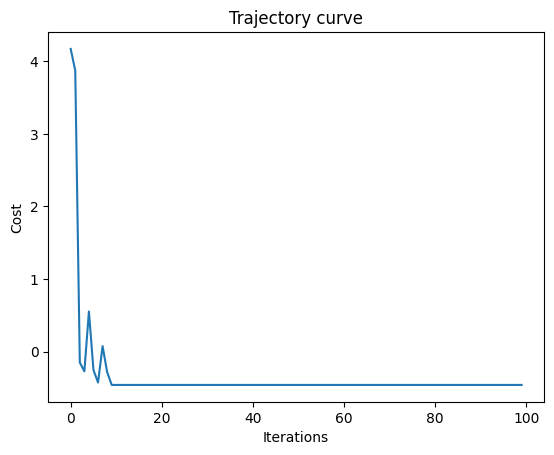

In [404]:
# Step 8: Train optimized parameter
w_result, b_result = SGD_Logistic(train_feature, train_label, learning_rate = 0.3)

In [405]:
# Step 9: Display with the result
print(w_result, b_result)

[[-1.78290083  1.77247128  2.33123634 ... -0.62787545 -0.22066284
   2.59293571]] [-4.20087146]


In [406]:
# Play with the result and the test set
print(w_result.shape)
print(test_feature.shape)
print(test_label.shape)

(1, 30000)
(42, 30000)
(42,)


In [407]:
# Step 10: Error function
def accuracy_rate(feature, label, w, b):
    temp_arr = np.round(sig(np.dot(feature, w.T) + b)) # temp_arr is of shape (k, 1)
    temp_arr += label.values.reshape(-1, 1) # test_label is of shape (k, 1)
    err = np.sum(temp_arr == 1)/temp_arr.shape[0]
    return 1 - err

In [408]:
# Step 11: Evaluate the performance of the logistic regression model
print("The accuracy rate of the testing dataset is: ", accuracy_rate(test_feature, test_label, w_result, b_result))
print("The accuracy rate of the training dataset is: ", accuracy_rate(train_feature, train_label, w_result, b_result))

The accuracy rate of the testing dataset is:  0.47619047619047616
The accuracy rate of the training dataset is:  1.0


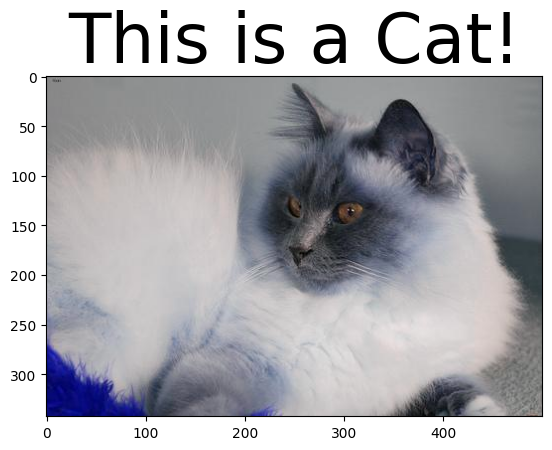

In [411]:
# Step 12: Model evaluation on the cat and dog images
image1 = cv2.imread(r"C:\Users\leesi\Favorites\Data Sources\Cat and dog classification\Dataset\cat\Birman_132_jpg.rf.f5445061871c56755fa4365aa6c89433.jpg", cv2.IMREAD_COLOR) 
image1_test = cv2.resize(image1, (100, 100))
image1_test = image1_test.flatten()/255 
labelForimage1 = "This is a Cat!" if sig(np.dot(image1_test, w_result.T) + b_result) > 0 else "This is a Dog!"

plt.imshow(image1)
plt.title(labelForimage1, fontsize = 50)
plt.show()